# Exploratory data analysis (EDA)
## Abhisek Sarkar

Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import font

Load the data

In [2]:
# Load the dataset
file_path = 'D:\\Infosys Internship\\Healthcare Providers.csv'
df = pd.read_csv(file_path)

Check if the Data is properly loaded

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(df.info())

# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())

# Checking for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

First few rows of the dataset:
     index  National Provider Identifier  \
0  8774979                    1891106191   
1  3354385                    1346202256   
2  3001884                    1306820956   
3  7594822                    1770523540   
4   746159                    1073627758   

  Last Name/Organization Name of the Provider First Name of the Provider  \
0                                 UPADHYAYULA                  SATYASREE   
1                                       JONES                      WENDY   
2                                    DUROCHER                    RICHARD   
3                                     FULLARD                     JASPER   
4                                    PERROTTI                    ANTHONY   

  Middle Initial of the Provider Credentials of the Provider  \
0                            NaN                        M.D.   
1                              P                        M.D.   
2                              W                       

In [4]:
# Descriptive Statistics
df.describe()

index  National Provider Identifier  Zip Code of the Provider
count  1.000000e+05                  1.000000e+05              1.000000e+05
mean   4.907646e+06                  1.498227e+09              4.163820e+08
std    2.839633e+06                  2.874125e+08              3.082566e+08
min    2.090000e+02                  1.003001e+09              6.010000e+02
25%    2.458791e+06                  1.245669e+09              1.426300e+08
50%    4.901266e+06                  1.497847e+09              3.633025e+08
75%    7.349450e+06                  1.740374e+09              6.819881e+08
max    9.847440e+06                  1.993000e+09              9.990166e+08

In [5]:
# Descriptive Statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

### Missing Data and Duplicates

In [6]:
# Missing values
print(df.isnull().sum())

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

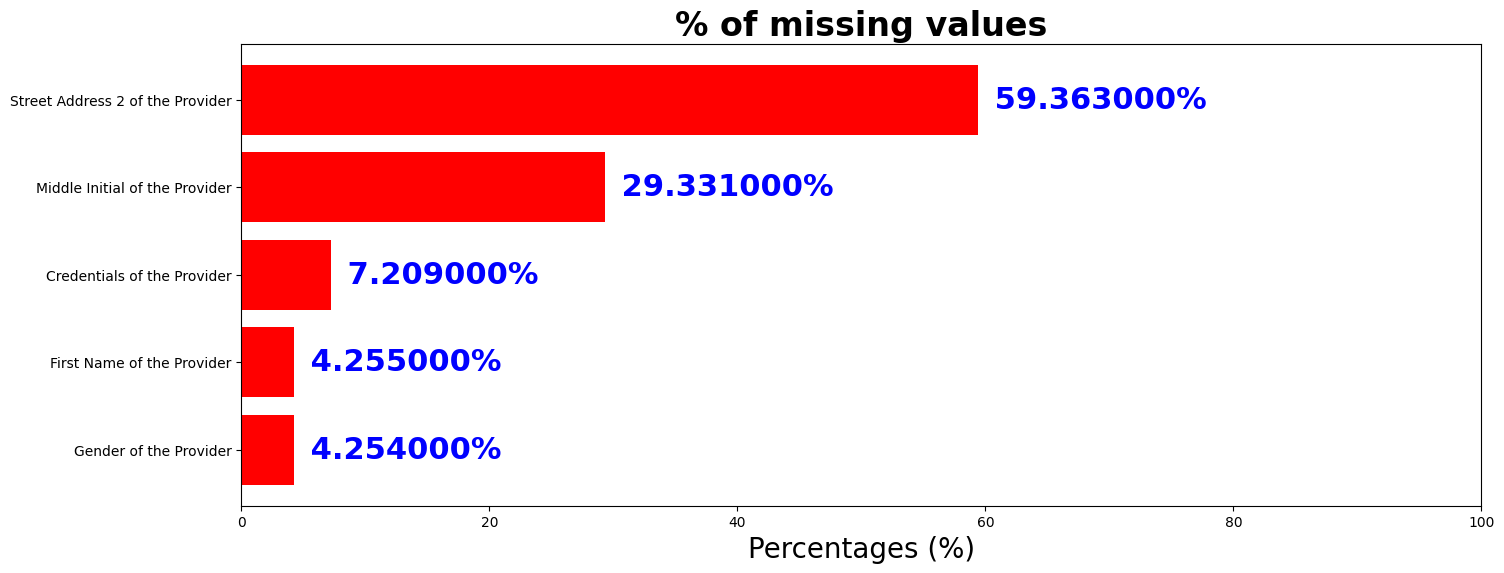

In [7]:

# Calculate the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0]/ df.shape[0])*100
missing_percentage.sort_values(ascending = True, inplace= True)

# Plot the Barch Chart
fig, ax = plt.subplots(figsize = (16,6))
ax.barh(missing_percentage.index, missing_percentage, color='red')

for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value + 0.5, i, f"{value: 2f}%", ha = 'left', va = 'center', fontweight = 'bold', fontsize=22, color = 'blue')

ax.set_xlim([0,100])

plt.title("% of missing values", fontweight = 'bold', fontsize=24, color = 'black' )
plt.xlabel('Percentages (%)', fontsize = 20)
plt.show()

In [8]:
# Numeric Columns
numeric_columns = [
 'Number of Services',
 'Number of Medicare Beneficiaries',
 'Number of Distinct Medicare Beneficiary/Per Day Services',
 'Average Medicare Allowed Amount',
 'Average Submitted Charge Amount',
 'Average Medicare Payment Amount',
 'Average Medicare Standardized Amount'
]
for column in numeric_columns:
 df[column] = pd.to_numeric(df[column], errors='coerce')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [9]:
# Imputation of missing values with mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
print(df.isnull().sum())

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [10]:
# Check for duplicates
print(df.duplicated().sum())

0


### Preprocess Data

In [11]:
# Merging the First Name, Middle initial and last name into full name

def create_full_name(row):
  # Extract names
  first_name = row['First Name of the Provider']
  middle_initial = row['Middle Initial of the Provider']
  last_name = row['Last Name/Organization Name of the Provider']
  
  # Construct full name with space in place of missing middle initial
  full_name = f"{first_name} {' ' if pd.isna(middle_initial) else middle_initial} {last_name}"
  return full_name

# Apply function to create 'Full Name' column with space for missing middle initial
df['Full Name'] = df.apply(create_full_name, axis=1)

# Drop the original columns
df.drop(columns=['First Name of the Provider', 'Middle Initial of the Provider', 'Last Name/Organization Name of the Provider'], inplace=True)

# Show the 'Full Name' column
print(df[['Full Name']])


                      Full Name
0       SATYASREE   UPADHYAYULA
1                 WENDY P JONES
2            RICHARD W DUROCHER
3              JASPER   FULLARD
4            ANTHONY E PERROTTI
...                         ...
99995              JOAN   PAPES
99996         MARGARET S HAYNER
99997           DANA   VALENCIA
99998  RAFAELA   GONZALEZ-LAMOS
99999         ELIIAN   RAMEZANI

[100000 rows x 1 columns]


In [12]:
# Merging the address

def create_full_address(row):
  # Extract address components
  address_1 = row['Street Address 1 of the Provider']
  address_2 = row['Street Address 2 of the Provider']
  city = row['City of the Provider']
  zip_code = row['Zip Code of the Provider']
  state_code = row['State Code of the Provider']
  country_code = row['Country Code of the Provider']
  
  # Construct full address with space for missing address line 2
  full_address = f"{address_1} {' ' if pd.isna(address_2) else address_2}"
  
  # Add remaining components with separators
  full_address += f", {city}, {zip_code}, {state_code}, {country_code}"
  return full_address

# Apply function to create 'Full Address' column with space for missing address line 2
df['Full Address'] = df.apply(create_full_address, axis=1)

#df.head()

# Show the 'Full Address' column
print(df[['Full Address']])


                                            Full Address
0      1402 S GRAND BLVD FDT 14TH FLOOR, SAINT LOUIS,...
1      2950 VILLAGE DR  , FAYETTEVILLE, 283043815.0, ...
2      20 WASHINGTON AVE STE 212, NORTH HAVEN, 647323...
3      5746 N BROADWAY ST  , KANSAS CITY, 641183998.0...
4      875 MILITARY TRL SUITE 200, JUPITER, 334585700...
...                                                  ...
99995  324 E BALTIMORE ST  , WILMINGTON, 604811236.0,...
99996      645 NW 4TH ST  , REDMOND, 977561502.0, OR, US
99997  3009 N BALLAS RD SUITE 202B, SAINT LOUIS, 6313...
99998  2365 BOSTON POST RD SUITE 201, LARCHMONT, 1053...
99999  444 MIDDLE NECK RD APT 1H  , GREAT NECK, 11023...

[100000 rows x 1 columns]


In [13]:
# Standardize credentials
df['Credentials of the Provider'] = df['Credentials of the Provider'].str.replace(r'\.|-', '', regex=True).str.upper()

# Show the cleaned credentials
#print(df.head())
print(df[['Credentials of the Provider']])



      Credentials of the Provider
0                              MD
1                              MD
2                             DPM
3                              MD
4                              DO
...                           ...
99995                          PT
99996                        ARNP
99997                          MD
99998                         NaN
99999                         NaN

[100000 rows x 1 columns]


### Begin analysis

##### Distribution of Provider Credentials

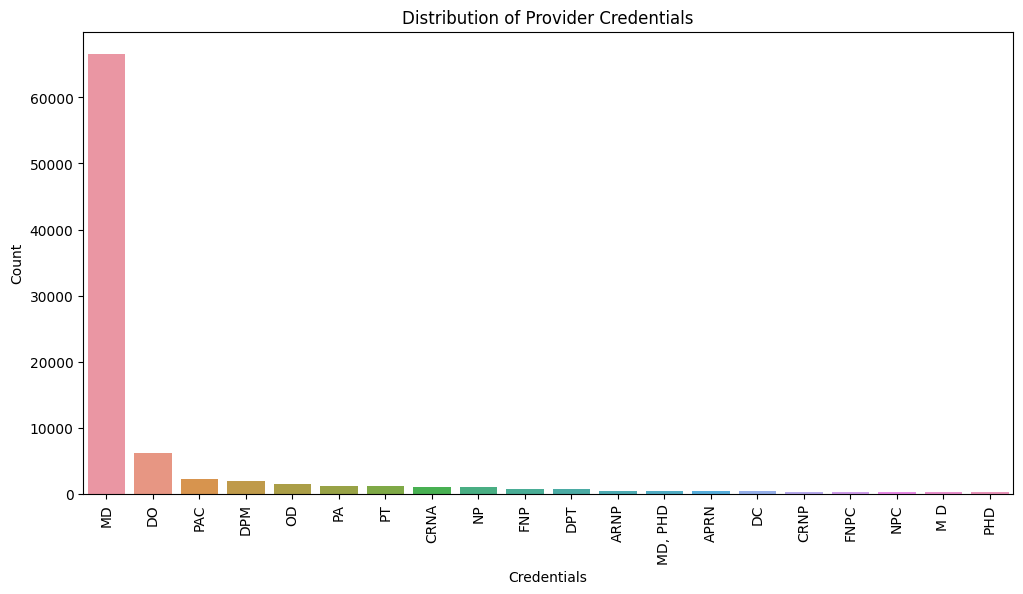

In [14]:
# Plot bar plot for Credentials of the Provider
credentials_counts = df['Credentials of the Provider'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=credentials_counts.index, y=credentials_counts.values)
plt.title('Distribution of Provider Credentials')
plt.xlabel('Credentials')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

##### Gender Ratio for Providers by Credential

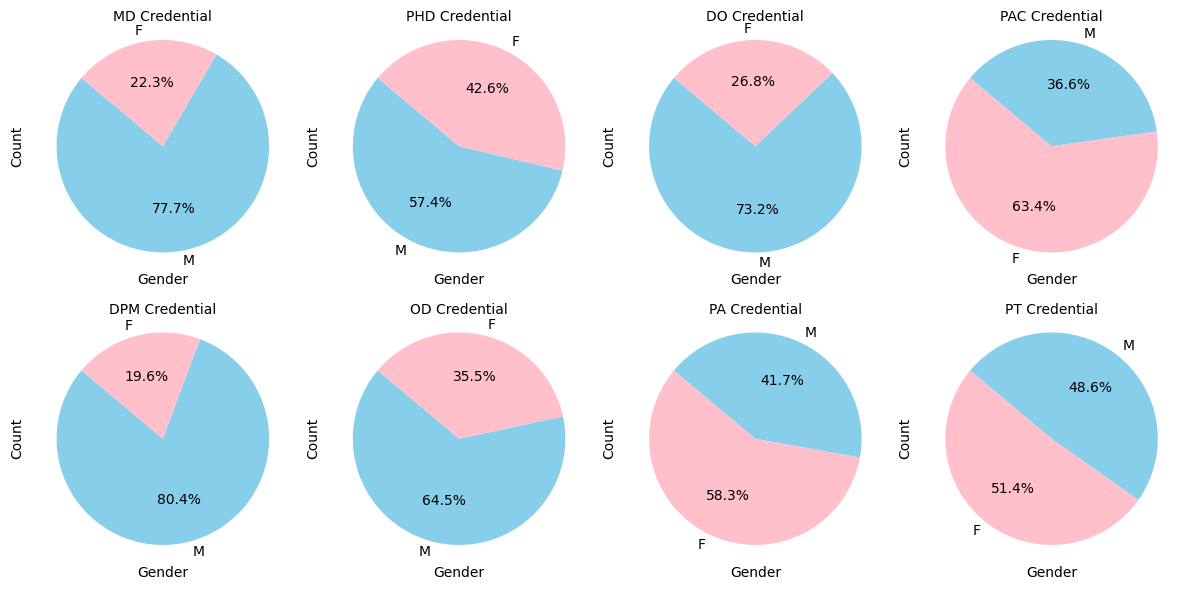

In [15]:
credentials = ['MD', 'PHD', 'DO', 'PAC', 'DPM', 'OD', 'PA', 'PT']
colors = {'M': 'skyblue', 'F': 'pink'}  # Colors for M and F

# Define layout for subplots (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(12, 6))  # Adjust figsize for better visualization

# Iterate through credentials and create subplots
for i, credential in enumerate(credentials):
  row = i // 4  # Integer division for row index
  col = i % 4  # Modulo for column index
  ax = axes[row, col]

  # Filter data for the specific credential
  credential_data = df[df['Credentials of the Provider'] == credential]
  
  # Count occurrences of each gender for the credential
  gender_counts = credential_data['Gender of the Provider'].value_counts()
  
  # Prepare colors based on gender
  pie_colors = [colors[label] for label in gender_counts.index]
  
  # Create pie chart
  gender_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=140, colors=pie_colors)
  ax.set_title(f"{credential} Credential", fontsize=10)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Count')
  ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Tight layout to avoid overlapping elements
plt.tight_layout()
plt.show()


##### Gender Distribution of provider by State

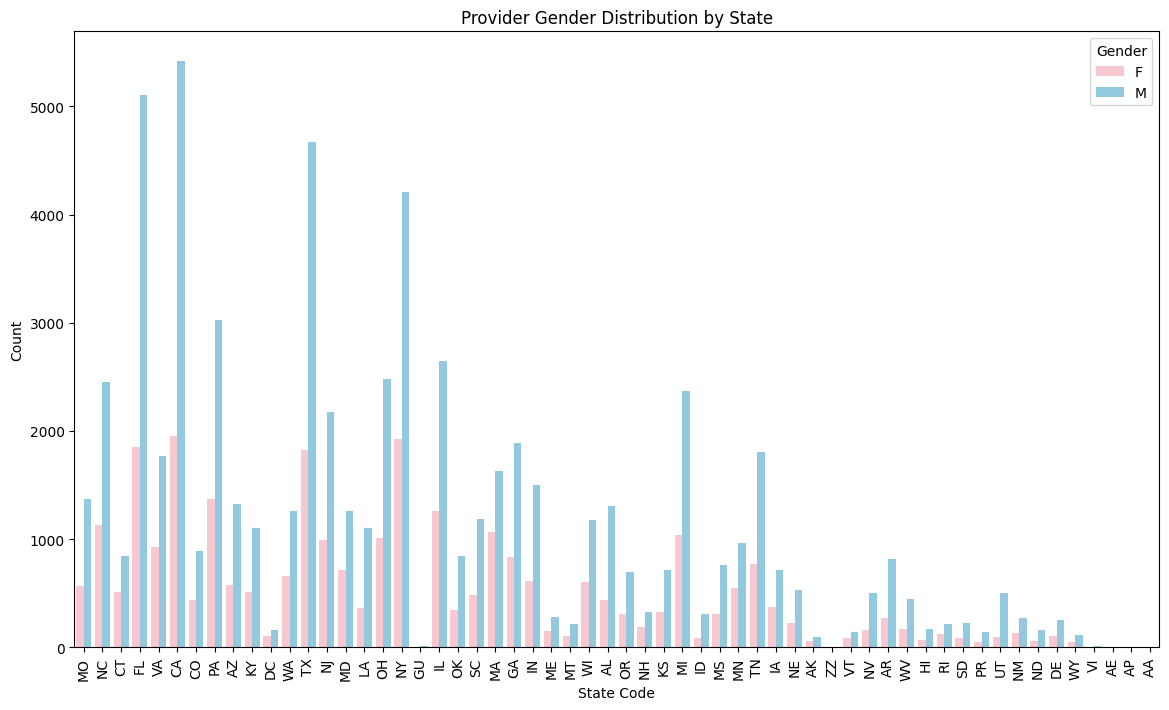

In [38]:
# Create a custom color palette for M (sky blue) and F (pink)
custom_palette = ['pink','skyblue']

# Create the bar chart using seaborn's countplot for clarity and color control
plt.figure(figsize=(14, 8))
sns.countplot(x='State Code of the Provider', hue='Gender of the Provider', data=df, palette=custom_palette)

# Add title, labels, and legend
plt.title('Provider Gender Distribution by State')
plt.xlabel('State Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender')

plt.show()

c:\Python311\Lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.5294117647058824, 0.807843137254902, 0.9215686274509803)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


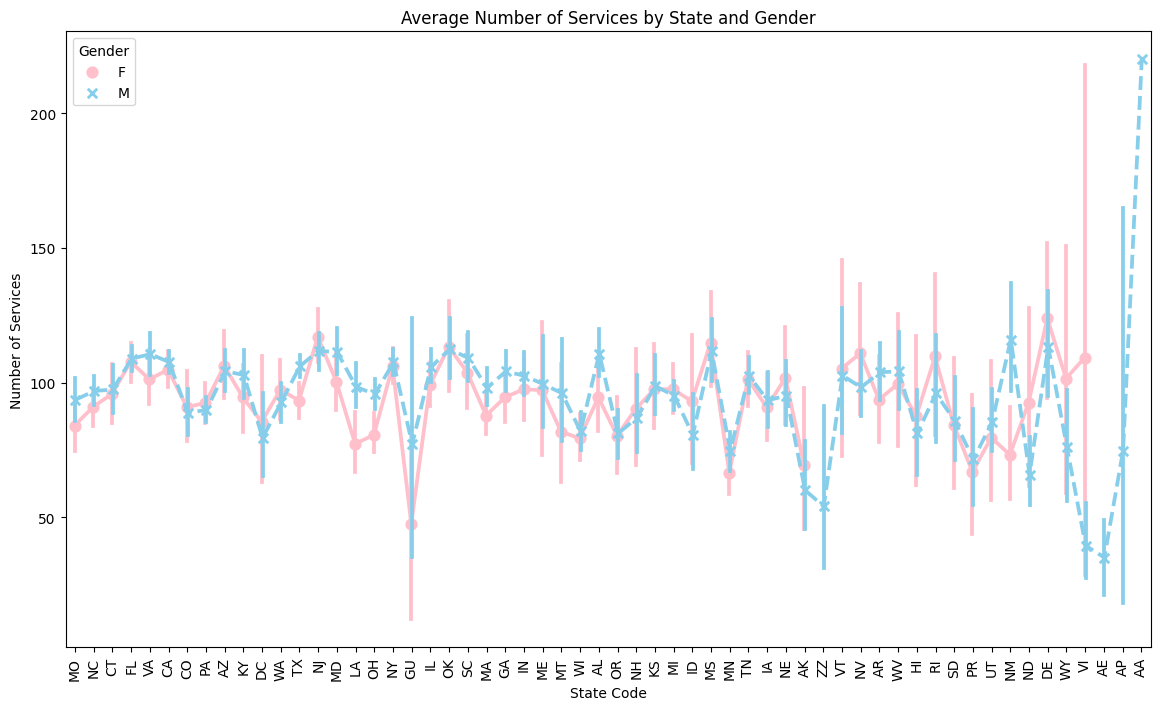

In [41]:
# Define a custom color palette for M (sky blue) and F (pink)
custom_palette = ['pink', 'skyblue']

# Create the point plot using seaborn
plt.figure(figsize=(14, 8))
sns.pointplot(x='State Code of the Provider', y='Number of Services', hue='Gender of the Provider', data=df,
             palette=custom_palette, dodge=True, markers=["o", "x"], linestyles=["-", "--"])

# Add title, labels, and legend
plt.title('Average Number of Services by State and Gender')
plt.xlabel('State Code')
plt.ylabel('Number of Services')
plt.xticks(rotation=90)
plt.legend(title='Gender')

plt.show()

##### 

##### Number of Providers by State Code

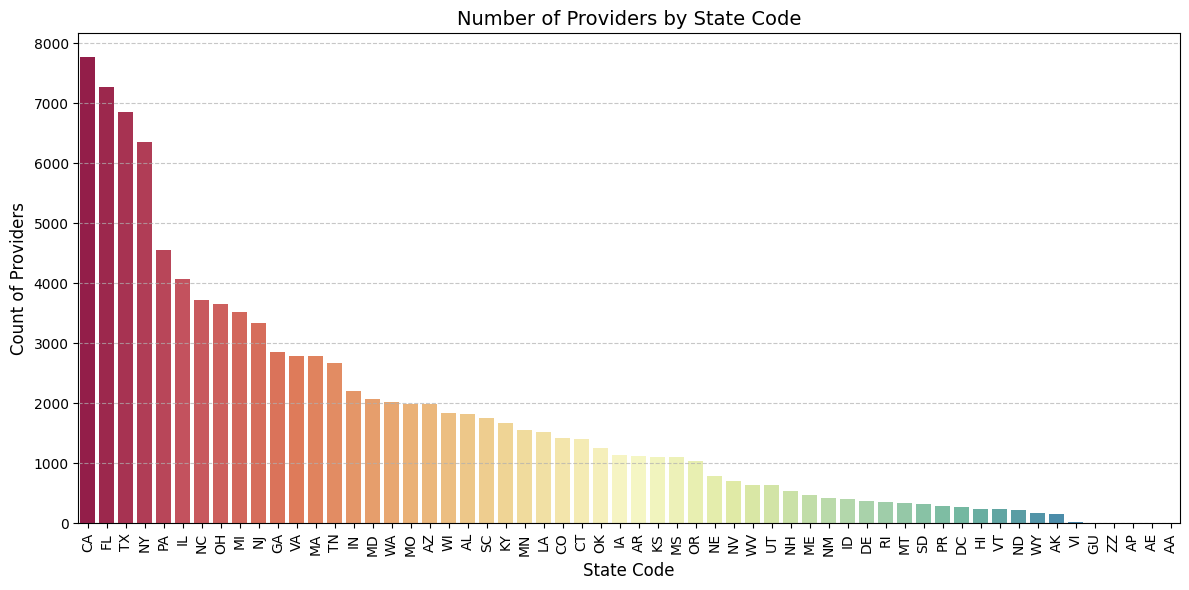

In [16]:
# Count occurrences of each state code
state_counts = df['State Code of the Provider'].value_counts()

# Create a bar graph for state distribution (using seaborn)
plt.figure(figsize=(12, 6))  # Set figure size for readability
sns.barplot(
    x=state_counts.index,
    y=state_counts.values,
    palette= 'Spectral'
)

# Add informative title and labels
plt.title('Number of Providers by State Code', fontsize=14)  # Set title with larger font size
plt.xlabel('State Code', fontsize=12)  # Set x-axis label with clear font size
plt.ylabel('Count of Providers', fontsize=12)  # Set y-axis label with clear font size

# Rotate x-axis labels for better readability with many states
plt.xticks(rotation=90)

# Display the plot with gridlines for better visual reference
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines on y-axis with dashed line style and some transparency

plt.tight_layout()  # Adjust spacing to prevent overlapping elements

plt.show()

##### Histogram and Frequency Ploygon for numerical columns

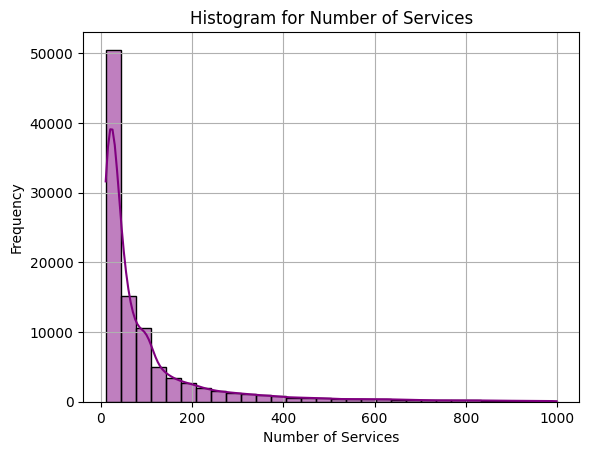

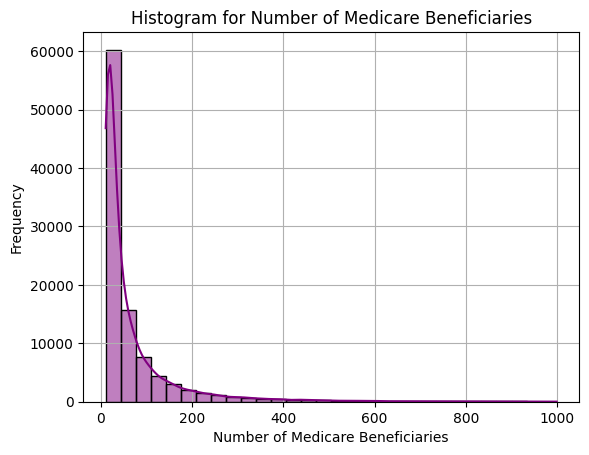

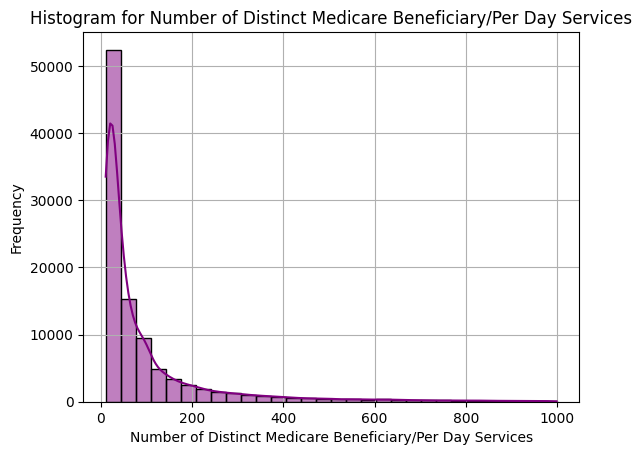

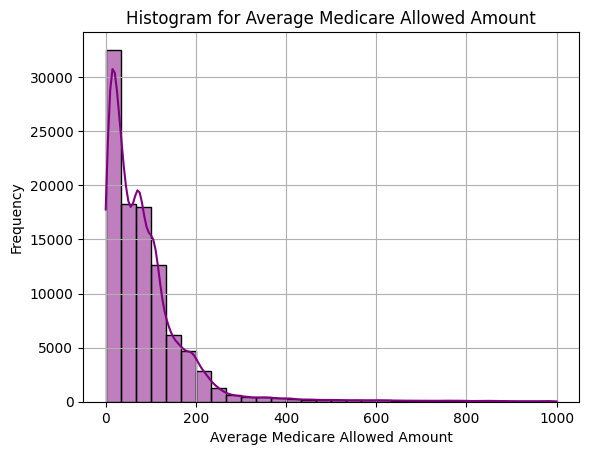

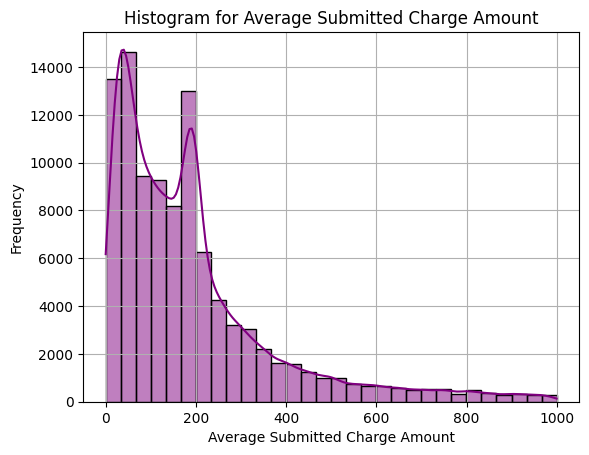

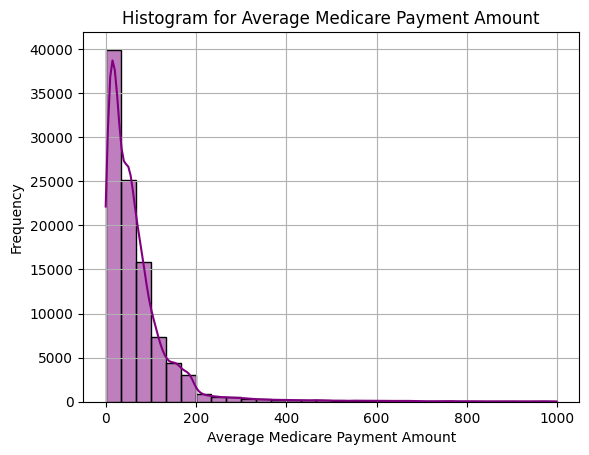

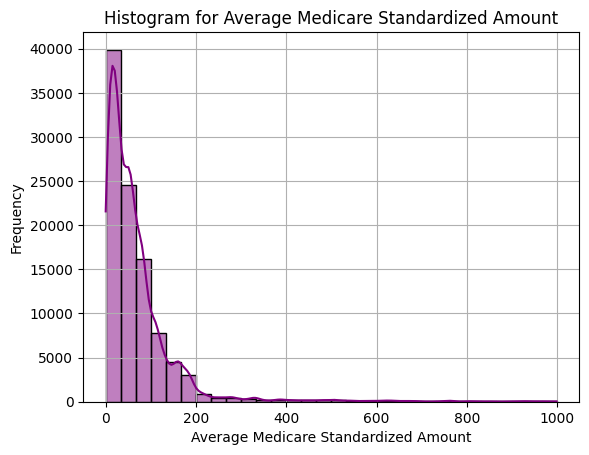

In [17]:
# Define columns to plot
columns_to_plot = [
    "Number of Services",
    "Number of Medicare Beneficiaries",
    "Number of Distinct Medicare Beneficiary/Per Day Services",
    "Average Medicare Allowed Amount",
    "Average Submitted Charge Amount",
    "Average Medicare Payment Amount",
    "Average Medicare Standardized Amount"
]



# Loop through each column and plot the frequency polygon
for col in columns_to_plot:
  plt.figure()  # Create a new figure for each plot
  sns.histplot(df[col].dropna(), bins=30, kde=True, color='purple')
  plt.xlabel(col)  # Set x-axis label
  plt.ylabel("Frequency")  # Set y-axis label
  plt.title(f"Histogram for {col}")  # Set plot title
  plt.grid(True)  # Add grid lines for better readability
  plt.show()  # Display the plot


##### Analysing Boolian Data with Pi chart

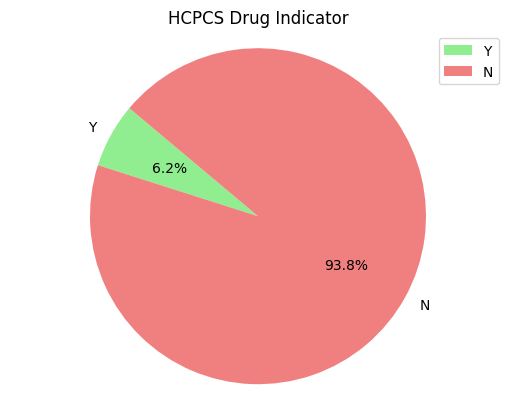

In [35]:
# HCPCS Drug Indicator
y_count = df[df['HCPCS Drug Indicator'] == 'Y'].shape[0]
n_count = df[df['HCPCS Drug Indicator'] == 'N'].shape[0]
total_count = y_count + n_count

# Calculate percentages (round to two decimal places)
y_percent = round((y_count / total_count) * 100, 2)
n_percent = round((n_count / total_count) * 100, 2)

# Create the pie chart
labels = ['Y', 'N']
sizes = [y_count, n_count]
colors = ['lightgreen', 'lightcoral']  # Customize colors as desired

plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title('HCPCS Drug Indicator')

# Add a legend to improve readability
plt.legend(labels, loc="best")

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures a circular pie
plt.show()

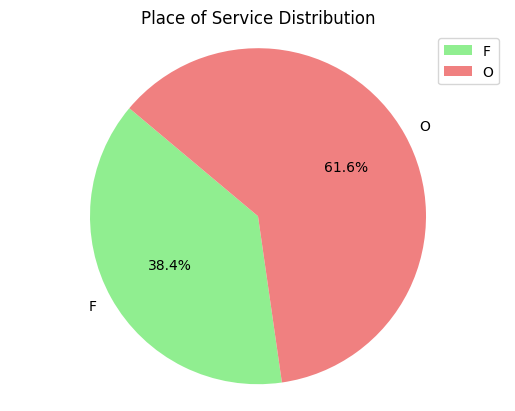

In [30]:
# Place of Service
F_count = df[df['Place of Service'] == 'F'].shape[0]
O_count = df[df['Place of Service'] == 'O'].shape[0]
total_count = F_count + O_count

# Calculate percentages (round to two decimal places)
F_percent = round((F_count / total_count) * 100, 2)
O_percent = round((O_count / total_count) * 100, 2)

# Create the pie chart
labels = ['F', 'O']
sizes = [F_count, O_count]
colors = ['lightgreen', 'lightcoral']  # Customize colors as desired

plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title('Place of Service Distribution')

# Add a legend to improve readability
plt.legend(labels, loc="best")

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures a circular pie
plt.show()

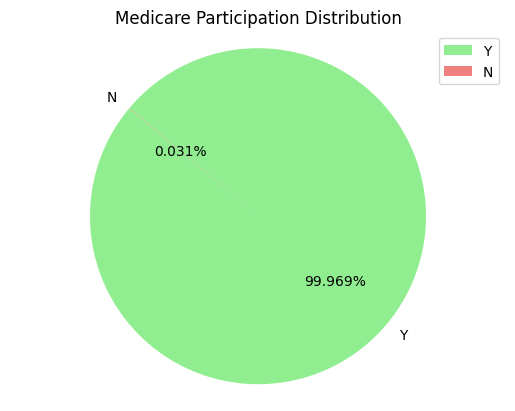

In [33]:
# Medicare Participation Distribution
y_count = df[df['Medicare Participation Indicator'] == 'Y'].shape[0]
n_count = df[df['Medicare Participation Indicator'] == 'N'].shape[0]
total_count = y_count + n_count

# Calculate percentages (round to two decimal places)
y_percent = round((y_count / total_count) * 100, 2)
n_percent = round((n_count / total_count) * 100, 2)

# Create the pie chart
labels = ['Y', 'N']
sizes = [y_count, n_count]
colors = ['lightgreen', 'lightcoral']  # Customize colors as desired

plt.pie(sizes, labels=labels, autopct="%1.3f%%", startangle=140, colors=colors)
plt.title('Medicare Participation Distribution')

# Add a legend to improve readability
plt.legend(labels, loc="best")

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures a circular pie
plt.show()

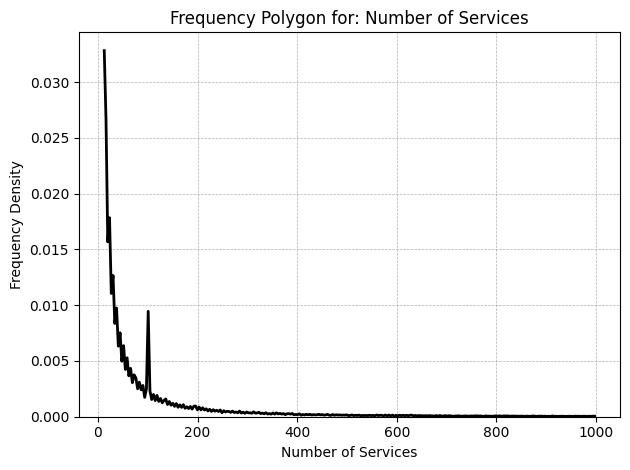

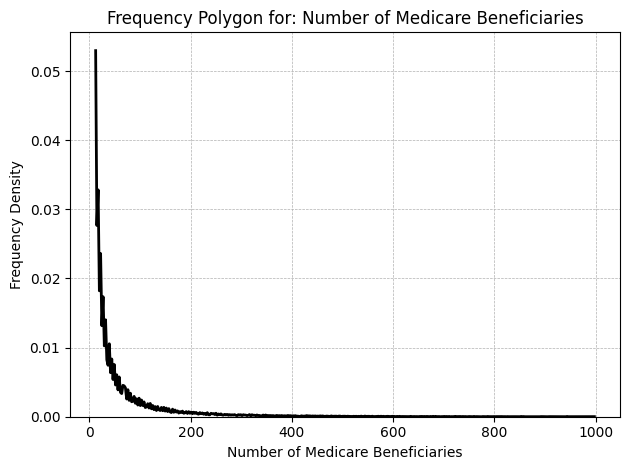

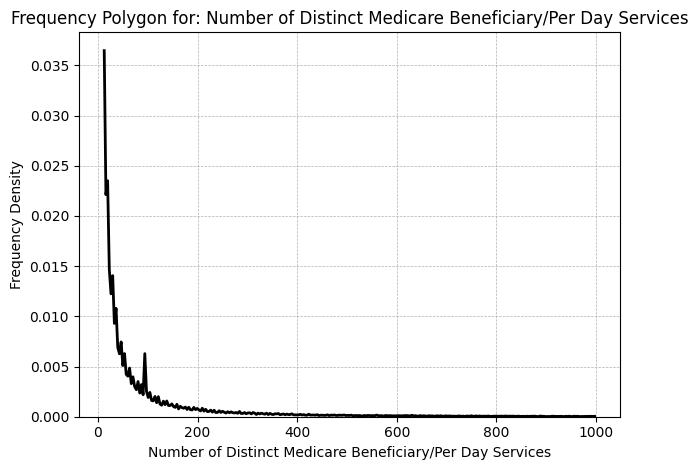

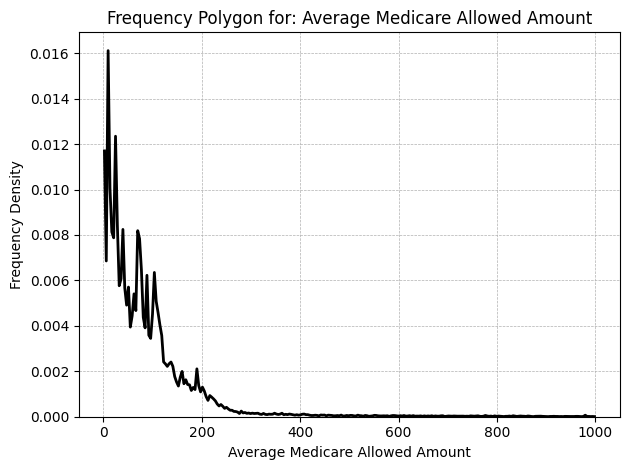

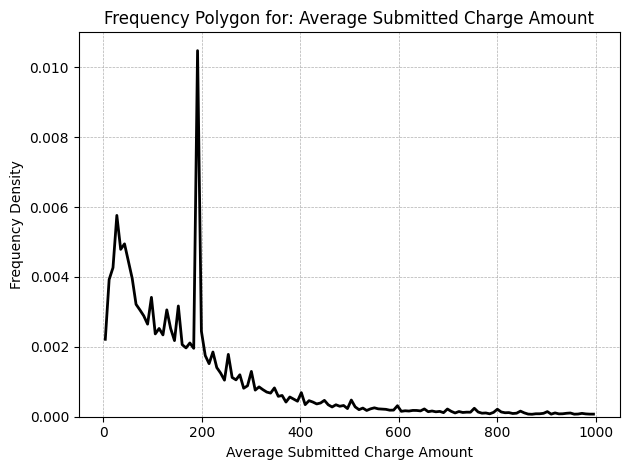

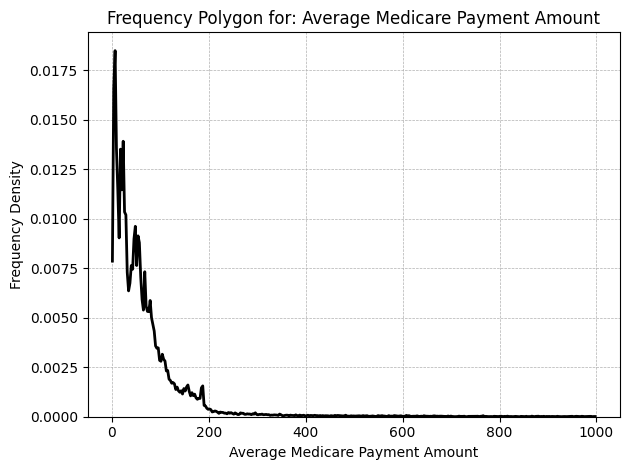

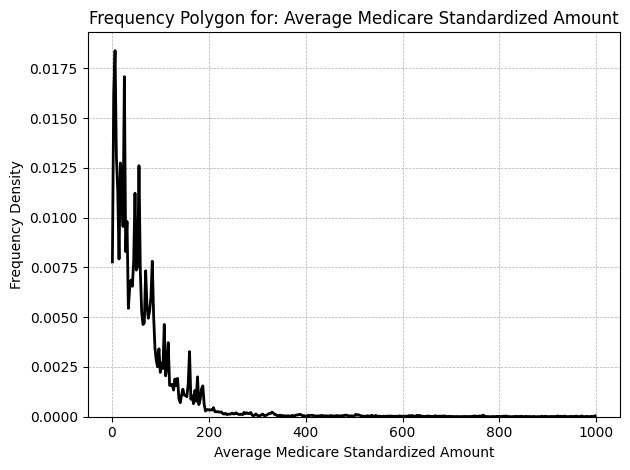

In [18]:
# Define columns to plot
columns_to_plot = [
    "Number of Services",
    "Number of Medicare Beneficiaries",
    "Number of Distinct Medicare Beneficiary/Per Day Services",
    "Average Medicare Allowed Amount",
    "Average Submitted Charge Amount",
    "Average Medicare Payment Amount",
    "Average Medicare Standardized Amount"
]

# Loop through each column and plot the frequency polygon
for col in columns_to_plot:
    plt.figure()  # Create a new figure for each plot

    # Use plt.hist with density=True for frequency polygon
    counts, bins, patches = plt.hist(df[col], bins='auto', edgecolor='black', density=True)

    # Remove bars from the plot to show only the polygon outline
    for patch in patches:
        patch.set_visible(False)

    # Plot the line segments connecting bin centers
    plt.plot(bins[:-1] + (bins[1:] - bins[:-1]) / 2, counts, color='black', linewidth=2)

    plt.xlabel(col)  # Set x-axis label
    plt.ylabel("Frequency Density")  # Change label to reflect density

    # Set plot title with a colon after column name
    plt.title(f"Frequency Polygon for: {col}")

    # Customize grid and add minor grid lines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


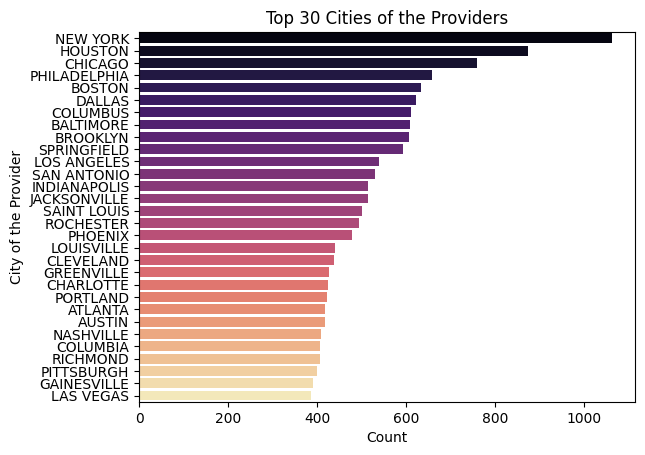

In [19]:
# occurrences of each city
city_counts = df['City of the Provider'].value_counts().head(30)

# Plot of top 20 cities
sns.barplot(x=city_counts.values, y=city_counts.index, palette='magma')
plt.title('Top 30 Cities of the Providers')
plt.xlabel('Count')
plt.ylabel('City of the Provider')
plt.show()

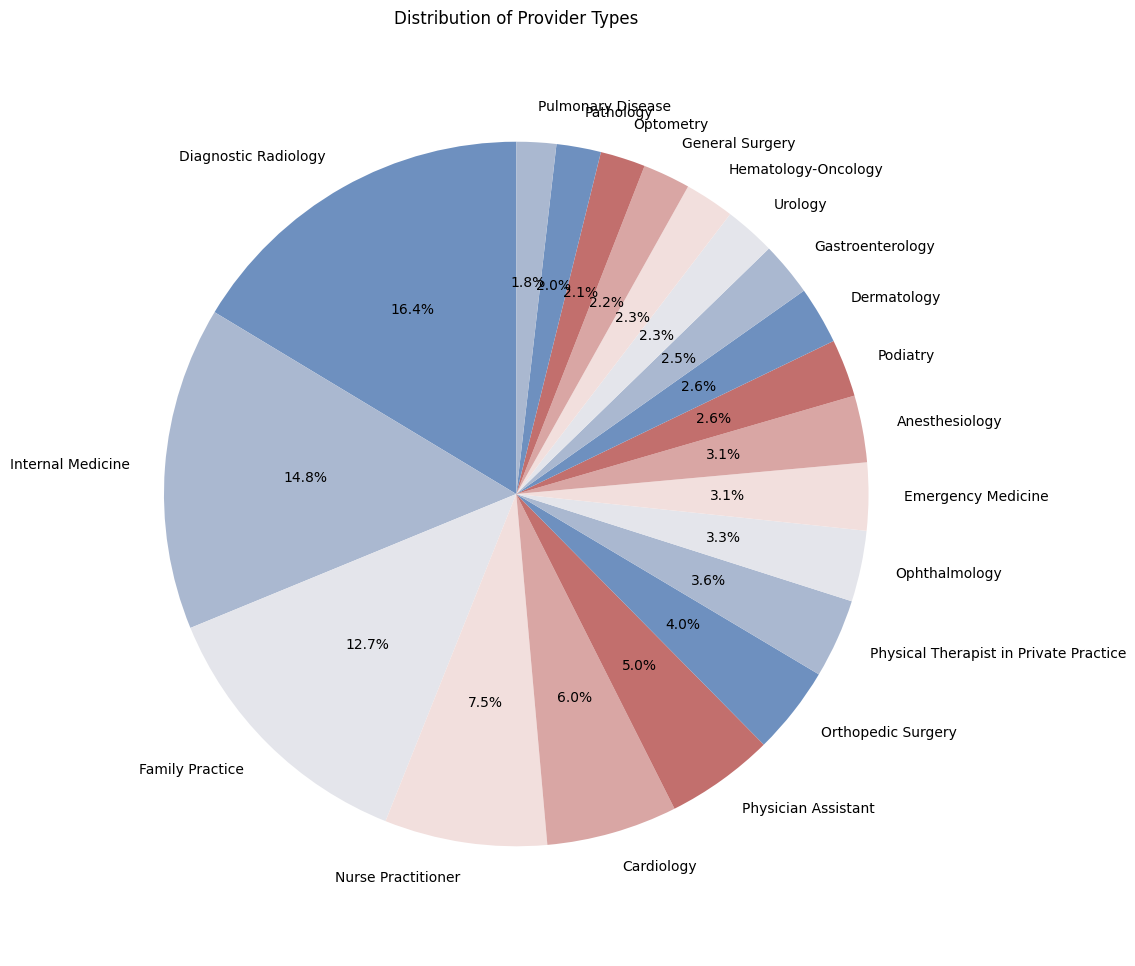

In [20]:
provider_type_counts = df['Provider Type'].value_counts().head(20)

palette = sns.color_palette("vlag")

# Create pie chart with the chosen palette
plt.figure(figsize=(10, 12))
plt.pie(provider_type_counts, labels=provider_type_counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
plt.title('Distribution of Provider Types')
plt.axis('equal')
plt.show()

#### Scatter Plot of Average Submitted Charge Amount vs. Average Medicare Payment Amount

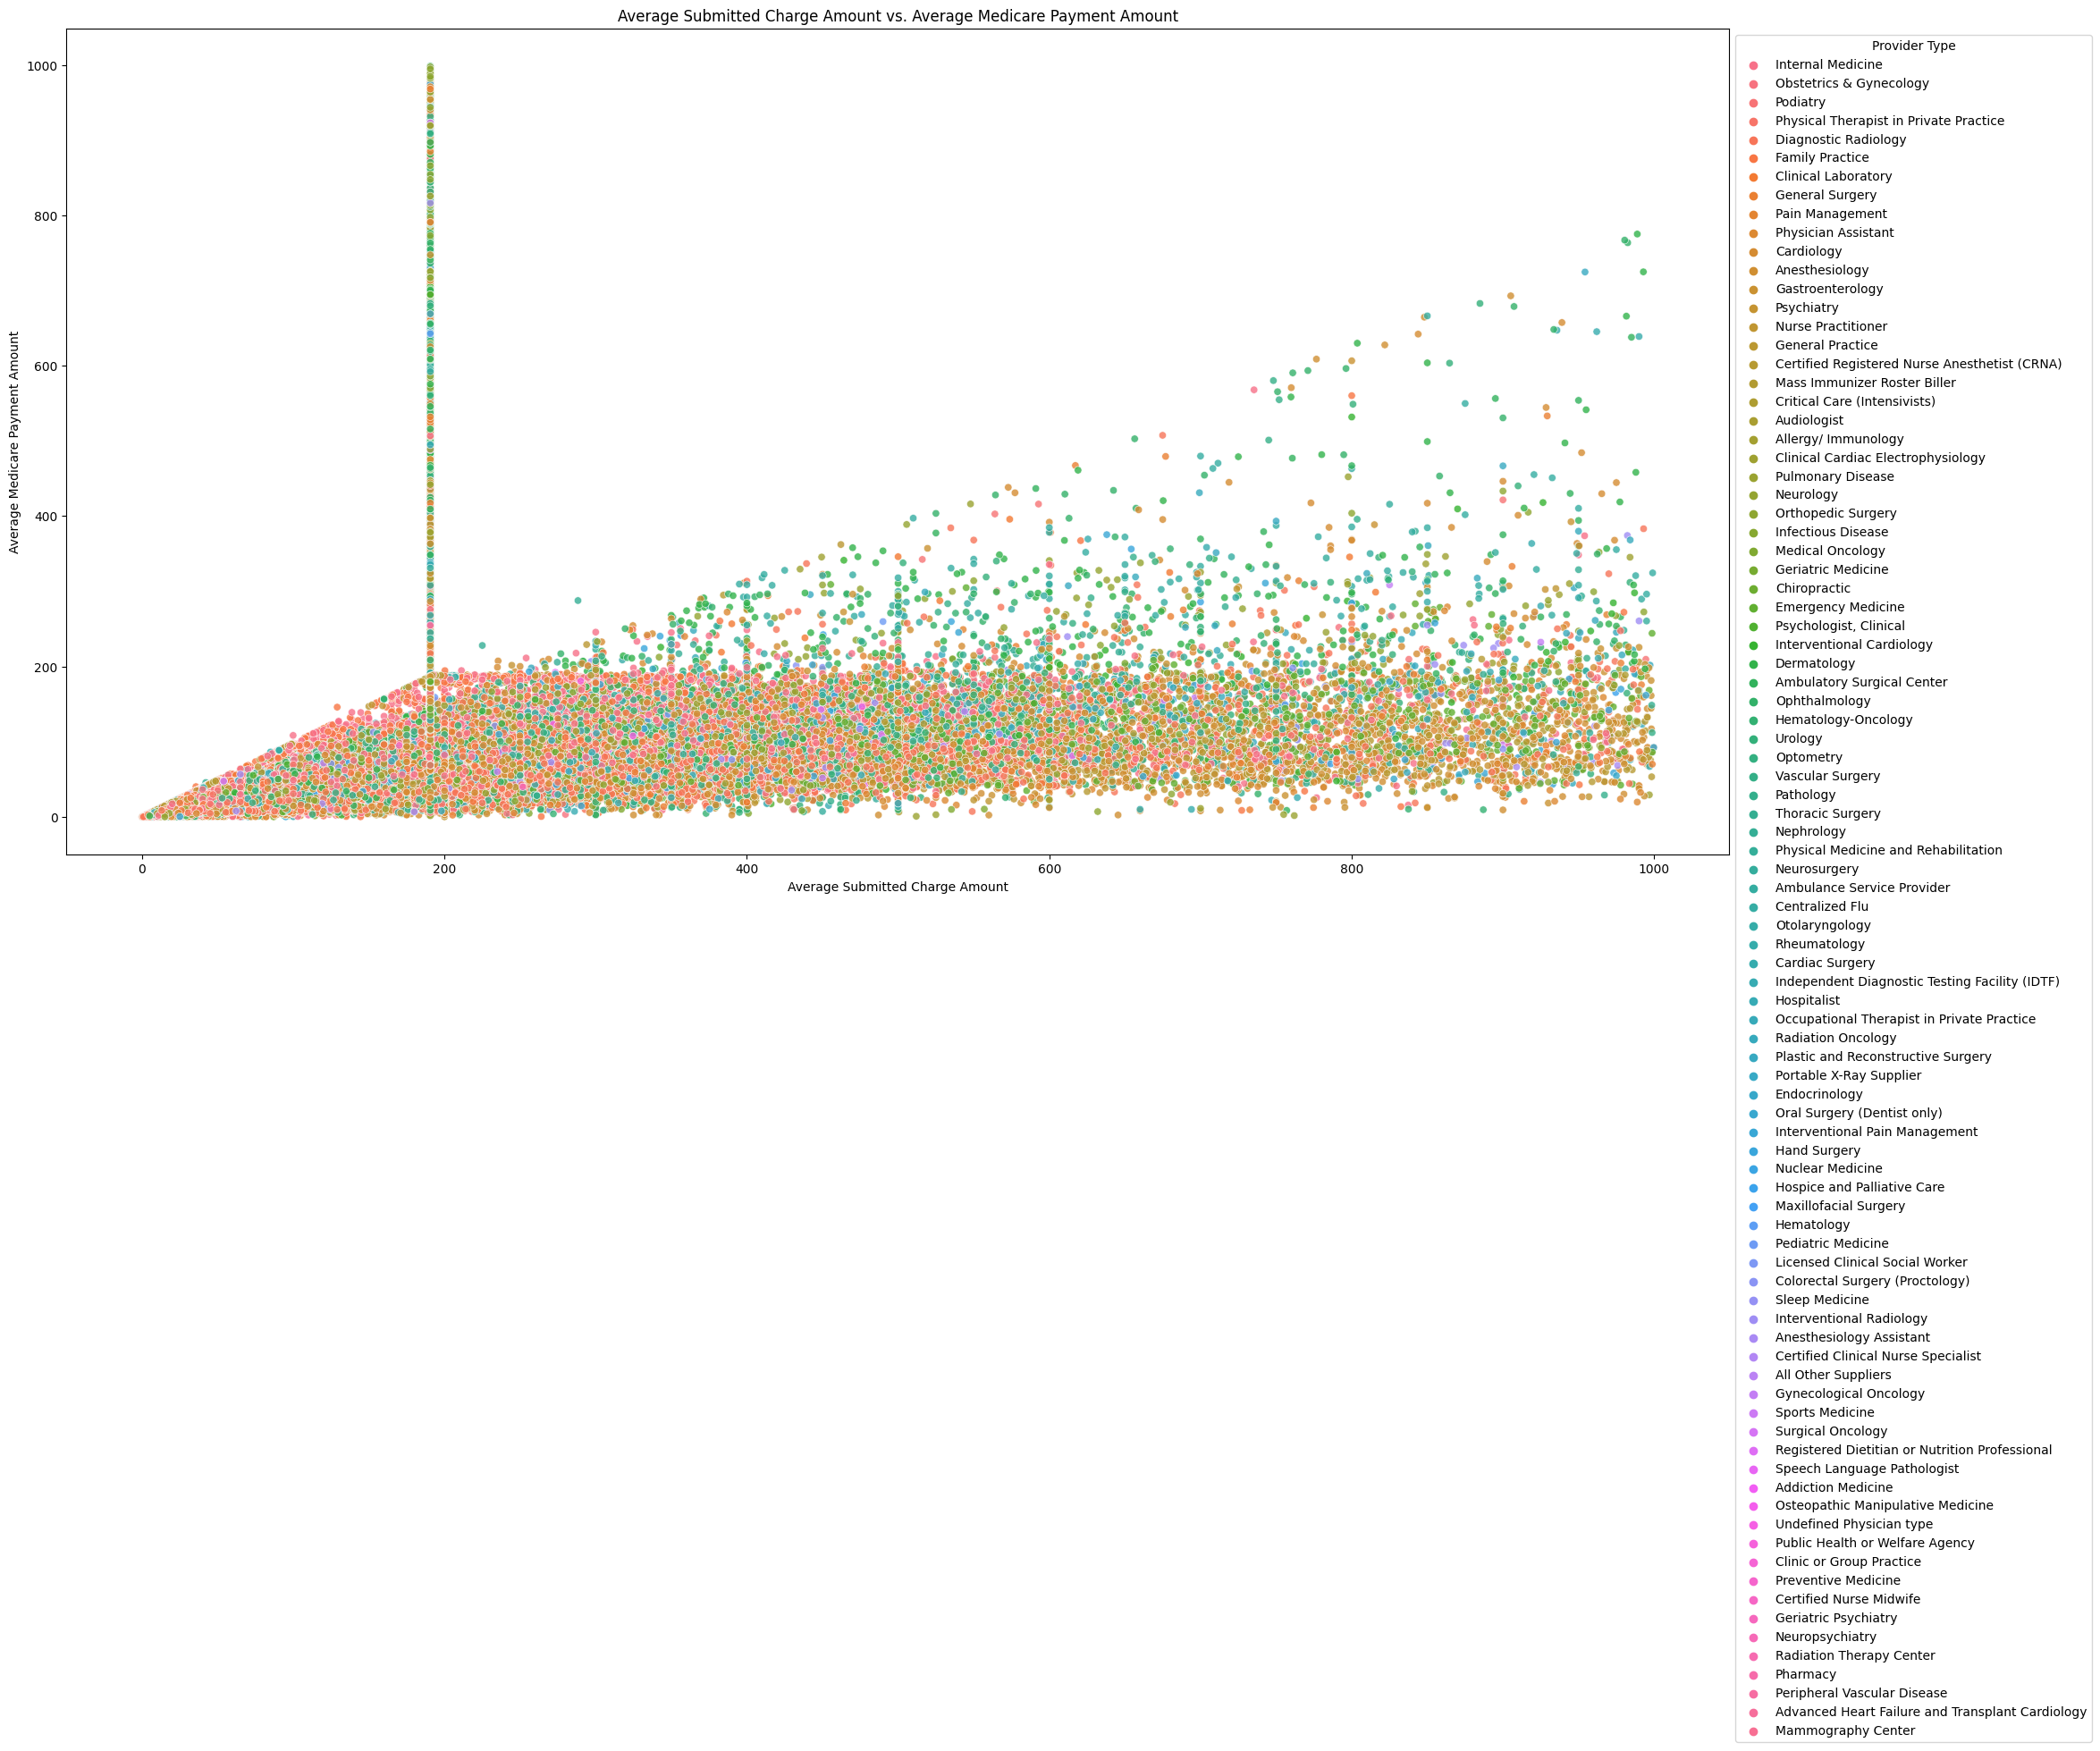

In [54]:
plt.figure(figsize=(24, 12))
sns.scatterplot(x='Average Submitted Charge Amount', y='Average Medicare Payment Amount', data=df, hue='Provider Type', alpha=0.8)
plt.title('Average Submitted Charge Amount vs. Average Medicare Payment Amount')
plt.xlabel('Average Submitted Charge Amount')
plt.ylabel('Average Medicare Payment Amount')
plt.legend(title='Provider Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


##### Correlation Matrix

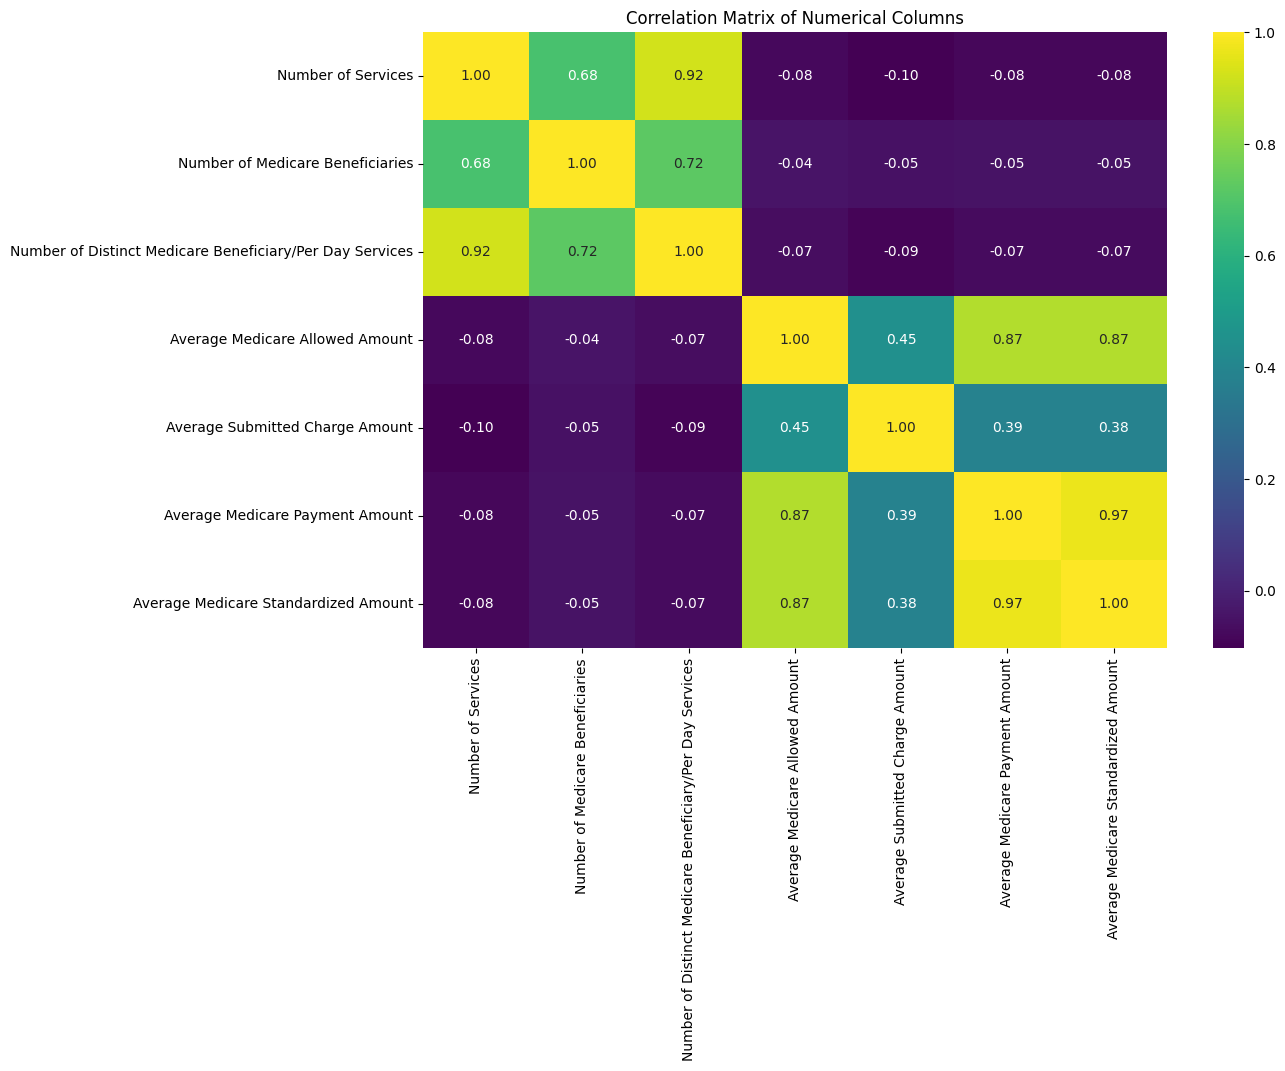

In [21]:
corr_matrix = df[numeric_columns].corr()

#correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

##### Pair plot

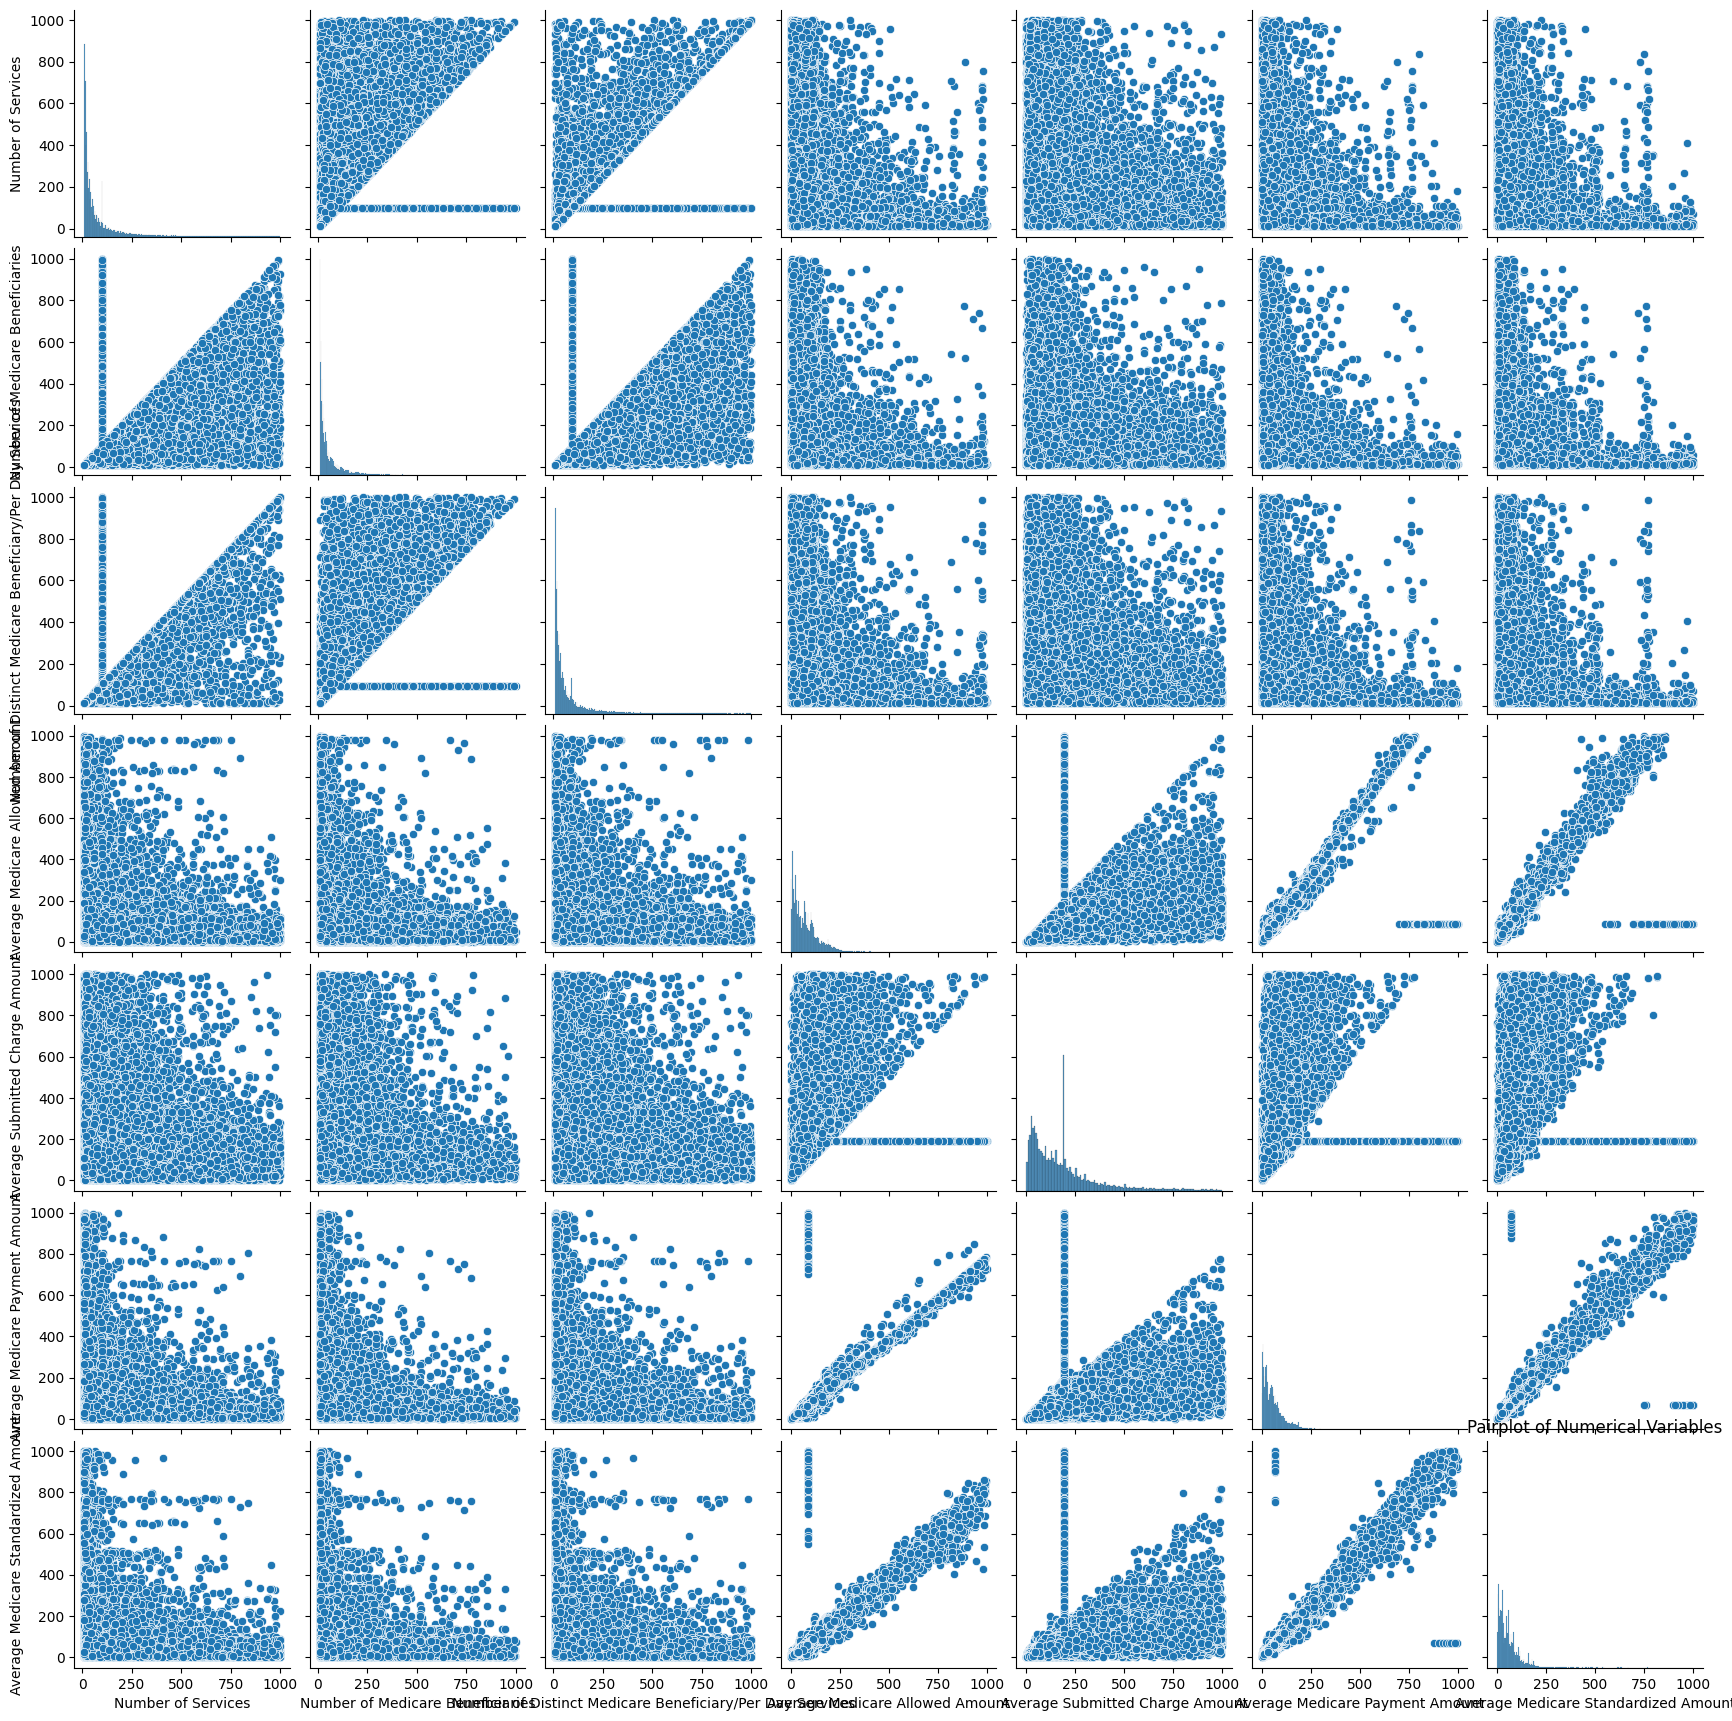

In [22]:
sns.pairplot(df[numeric_columns])
plt.title('Pairplot of Numerical Variables')
plt.show()

##### Correlation between Number of Services and Payment Amounts

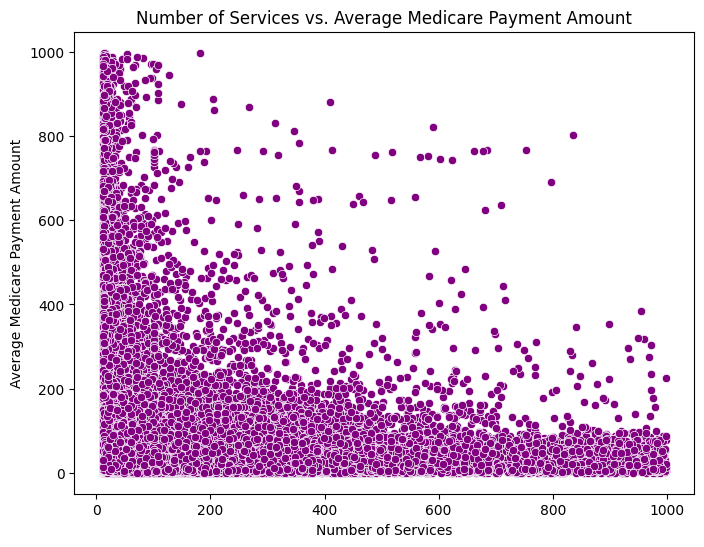

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Number of Services', y='Average Medicare Payment Amount', data=df, color='purple')  # Change 'red' to any desired color
plt.title('Number of Services vs. Average Medicare Payment Amount')
plt.xlabel('Number of Services')
plt.ylabel('Average Medicare Payment Amount')
plt.show()

##### Average Submitted Charge Amount by City

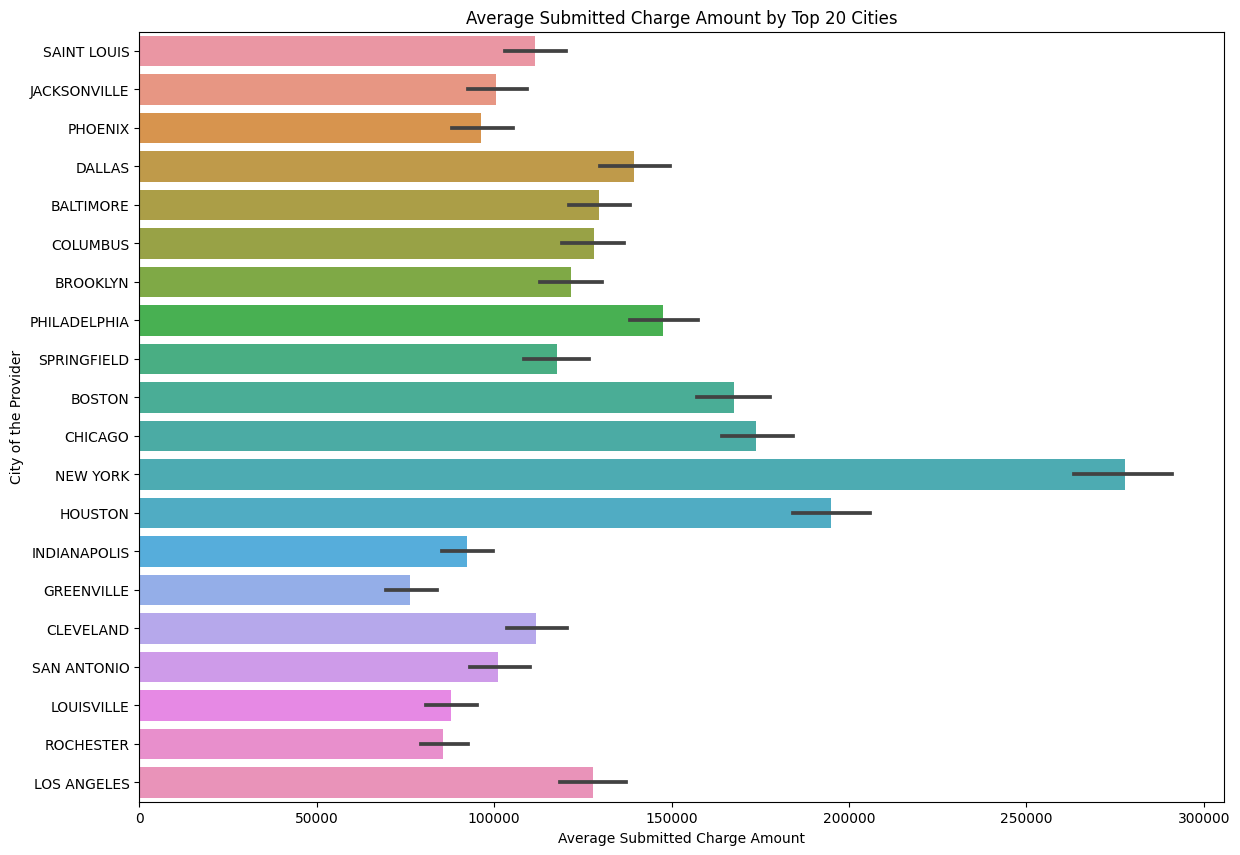

In [50]:
top_20_cities = df['City of the Provider'].value_counts().head(20).index
filtered_city_data = df[df['City of the Provider'].isin(top_20_cities)]

plt.figure(figsize=(14, 10))
sns.barplot(x='Average Submitted Charge Amount', y='City of the Provider', data=filtered_city_data, estimator=sum)
plt.title('Average Submitted Charge Amount by Top 20 Cities')
plt.xlabel('Average Submitted Charge Amount')
plt.ylabel('City of the Provider')
plt.show()